In [2]:
import geopandas as gpd
import networkx as nx
import pandas as pd
import tempun
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from celluloid import Camera
import random
import geopandas as gpd
from shapely.geometry import LineString, Point, MultiPoint

import google_conf

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

from IPython.display import HTML
#result = pyreadr.read_r('/path/to/file.Rds')


In [3]:
plt.style.use('seaborn-white')
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.size'] = 8

def save_figure(fig, fig_name):
    fig.savefig("../figures/" + fig_name + ".tiff")
    fig.savefig("../figures/" + fig_name + ".png")

/var/folders/zg/zvg9y3rs7j527jxfq9sc2xqc0000gn/T/ipykernel_20262/1576836852.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [4]:
pleiades_regions = gpd.read_file("../data/pleiades_regions.geojson", driver="GeoJSON")
pleiades_regions_merged = pleiades_regions.unary_union

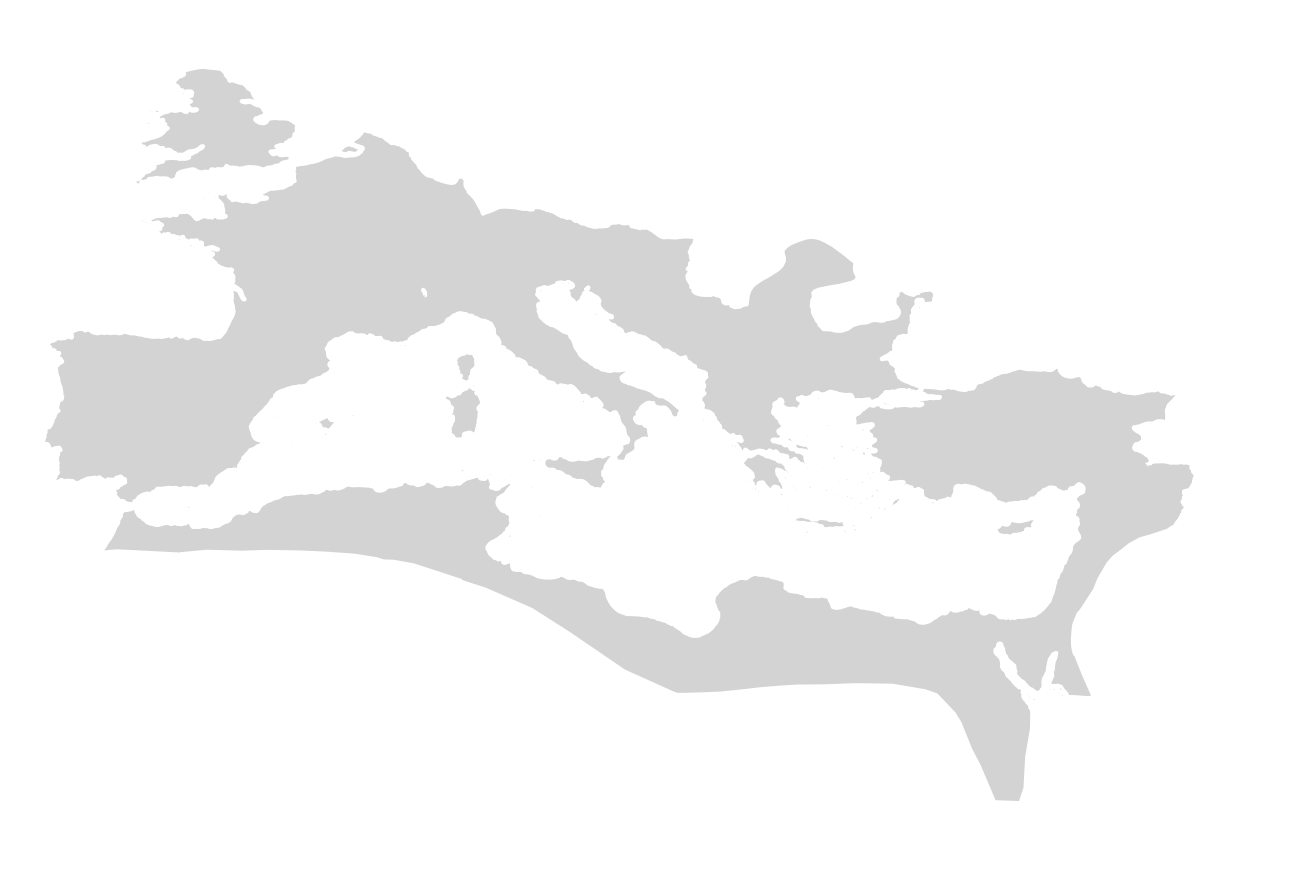

In [30]:
fig, ax = plt.subplots(figsize=(5.2, 3), dpi=300, tight_layout=True)
gpd.GeoSeries(pleiades_regions_merged).plot(ax=ax, color="lightgray")
#GIST.plot()
ax.set_xlim(-10, 45)
ax.set_axis_off()

In [5]:
origo_sheet = google_conf.setup("https://docs.google.com/spreadsheets/d/17ibTaRJHHevY2wVsx9aK-NEd54fGho69l5dGJNE3XBA/edit?usp=sharing", service_account_path="../../ServiceAccountsKey.json")
origo_df = google_conf.get_as_dataframe(origo_sheet.worksheet("2023WORKSHEET"))

In [6]:
#origo_df = pd.read_json("../data/origo_df.json")

In [7]:
origo_geo = origo_df[origo_df["pleiades_Latitude"].notnull() & origo_df["pleiades_Longitude"].notnull()]
len(origo_geo)

1723

In [8]:
origo_df

,Unnamed: 0,id,hd_nr,origo,origo_clean,pleiades_id,pleiades_title_list,pleiades_Latitude,pleiades_Longitude,pleiades_title,...,SourceURL(e.g. Pleiades id number or URL),PossiblePlace2,Note.1,Lat2,Long2,Link_or_Ref,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,87598,HD075902/1,HD075902,cives(!) (= civis) Nervius+,() (= ) Nervius,109199.0,NaN,50.777494,4.084768,Nervii,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,92334,HD081444/1,HD081444,natione(?)Pannonius,()Pannonius,992076.0,NaN,47.500000,12.500000,Pannoniae,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,62290,HD056833/3,HD056833,cives(= civis) Convena*,(= ) Convena,246357.0,NaN,42.966682,0.269919,Convenae,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19842,HD018231/1,HD018231,cives(= civis) Veliocassinius,(= ) Veliocassinius,109412.0,NaN,49.364001,0.831097,Veliocasses,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15178,HD010286/1,HD010286,natione+* [---] Aelia [---],[---] Aelia [---],197389.0,NaN,45.560018,18.675749,Mursa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633,88626,HD076988/1,HD076988,Σύρος,Σύρος,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2634,38460,HD035906/1,HD035906,Ταρσεὺς,Ταρσεὺς,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2635,39007,HD036383/1,HD036383,Φενήσιος,Φενήσιος,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2636,56619,HD051027/1,HD051027,Φιλππεύς+,Φιλππεύς+,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# use your own dataset
LIST = gpd.read_parquet("../../LIRE_ETL/data/large_data/LIST_v0-3.parquet")

In [10]:
len(LIST[LIST["EDH-ID"].isin(origo_geo["hd_nr"])])

1403

# Flying dots

In [11]:
LIST_edh= LIST[LIST["EDH-ID"].notnull()]
LIST_edh = LIST_edh[(LIST_edh["not_before"].notnull() | LIST_edh["not_after"].notnull())]
LIST_edh["random_dates"] = LIST_edh.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], size=10, antepost=True),axis=1)
LIST_edh["random_date"] = LIST_edh["random_dates"].apply(lambda x: x[0])

In [12]:
origo_geo["origo_point"] = origo_geo.apply(lambda row: Point([row["pleiades_Longitude"], row["pleiades_Latitude"]]), axis=1)
origo_geo = gpd.GeoDataFrame(origo_geo, geometry=origo_geo["origo_point"])

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/var/folders/zg/zvg9y3rs7j527jxfq9sc2xqc0000gn/T/ipykernel_20262/826567250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  origo_geo["origo_point"] = origo_geo.apply(lambda row: Point([row["pleiades_Longitude"], row["pleiades_Latitude"]]), axis=1)


<AxesSubplot: >

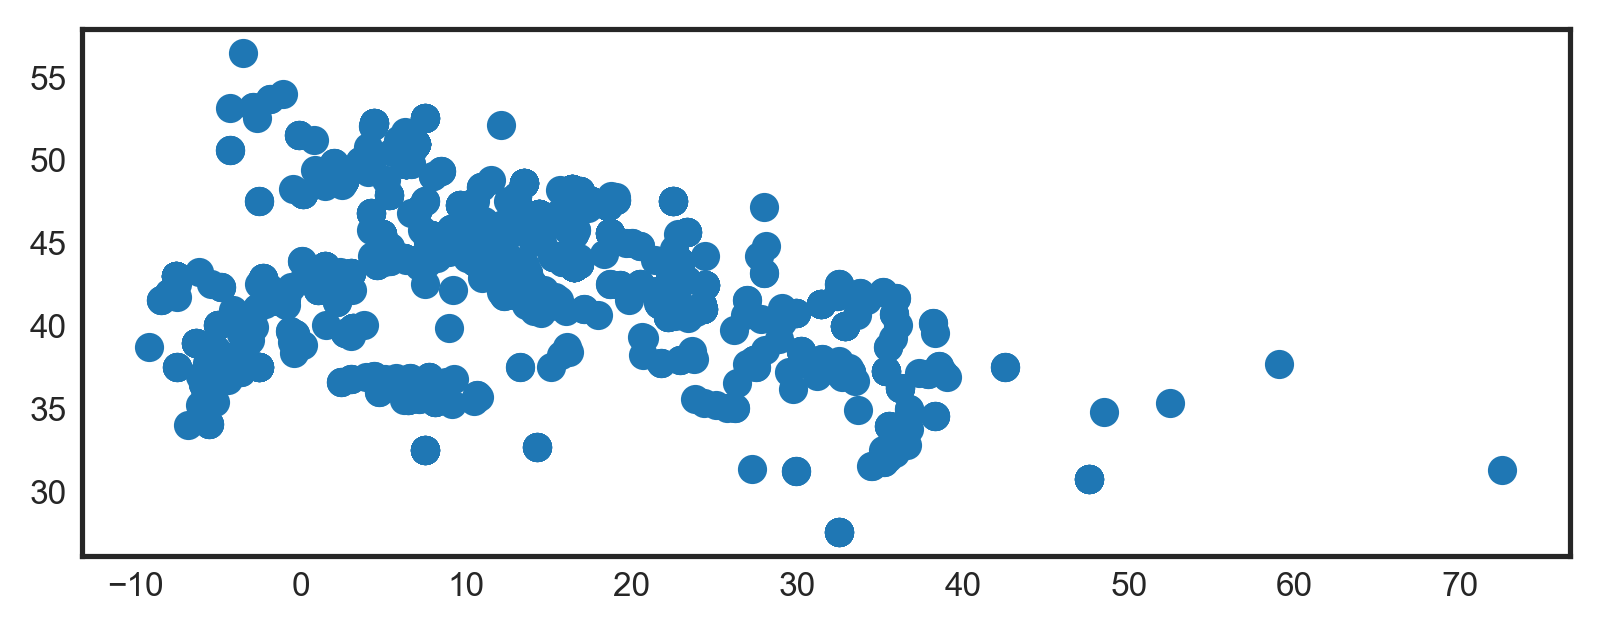

In [13]:
origo_geo.plot()

In [14]:
edh_geo_dict = dict(zip(LIST_edh["EDH-ID"], LIST_edh["geometry"]))
edh_date_dict = dict(zip(LIST_edh["EDH-ID"], LIST_edh["random_date"]))
def get_val_from_dict(x, data_dict):
    try:
        return data_dict[x]
    except:
        return None
origo_geo["edh_point"] = origo_geo["hd_nr"].apply(lambda x: get_val_from_dict(x, edh_geo_dict))
origo_geo["random_date"] = origo_geo["hd_nr"].apply(lambda x: get_val_from_dict(x, edh_date_dict))

In [15]:
origo_geo = origo_geo[(origo_geo["random_date"].notnull()) & (origo_geo["origo_point"].notnull()) & (origo_geo["edh_point"].notnull())]
len(origo_geo)

1631

In [16]:
origo_geo["origo_line"] = origo_geo.apply(lambda row: LineString([row["origo_point"], row["edh_point"]]), axis=1)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [17]:
origo_geo

,Unnamed: 0,id,hd_nr,origo,origo_clean,pleiades_id,pleiades_title_list,pleiades_Latitude,pleiades_Longitude,pleiades_title,...,Link_or_Ref,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,origo_point,geometry,edh_point,random_date,origo_line
0,87598,HD075902/1,HD075902,cives(!) (= civis) Nervius+,() (= ) Nervius,109199.0,NaN,50.777494,4.084768,Nervii,...,NaN,NaN,NaN,NaN,NaN,POINT (4.08476841415 50.7774935901),POINT (4.08477 50.77749),POINT (6.868 51.0651),376.0,"LINESTRING (4.08477 50.77749, 6.86800 51.06510)"
1,92334,HD081444/1,HD081444,natione(?)Pannonius,()Pannonius,992076.0,NaN,47.500000,12.500000,Pannoniae,...,NaN,NaN,NaN,NaN,NaN,POINT (12.5 47.5),POINT (12.50000 47.50000),POINT (-0.2088 51.4641),497.0,"LINESTRING (12.50000 47.50000, -0.20880 51.46410)"
2,62290,HD056833/3,HD056833,cives(= civis) Convena*,(= ) Convena,246357.0,NaN,42.966682,0.269919,Convenae,...,NaN,NaN,NaN,NaN,NaN,POINT (0.269918733812 42.9666817568),POINT (0.26992 42.96668),POINT (2.092 41.3839),107.0,"LINESTRING (0.26992 42.96668, 2.09200 41.38390)"
3,19842,HD018231/1,HD018231,cives(= civis) Veliocassinius,(= ) Veliocassinius,109412.0,NaN,49.364001,0.831097,Veliocasses,...,NaN,NaN,NaN,NaN,NaN,POINT (0.831097476911 49.3640014746),POINT (0.83110 49.36400),POINT (3.8777 51.6156),258.0,"LINESTRING (0.83110 49.36400, 3.87770 51.61560)"
4,15178,HD010286/1,HD010286,natione+* [---] Aelia [---],[---] Aelia [---],197389.0,NaN,45.560018,18.675749,Mursa,...,NaN,NaN,NaN,NaN,NaN,POINT (18.675749 45.560018),POINT (18.67575 45.56002),POINT (12.4862 41.8917),237.0,"LINESTRING (18.67575 45.56002, 12.48620 41.89170)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,81010,HD069801/1,HD069801,Virunum,Virunum,197583.0,['Virunum'],46.699615,14.364777,Virunum,...,NaN,NaN,NaN,NaN,NaN,POINT (14.3647773 46.6996149),POINT (14.36478 46.69961),POINT (-2.8952 53.1855),450.0,"LINESTRING (14.36478 46.69961, -2.89520 53.18550)"
2560,1015,HD000493/1,HD000493,Volubilis*,Volubilis,275740.0,['Volubilis'],34.072875,-5.554869,Volubilis,...,NaN,NaN,NaN,NaN,NaN,POINT (-5.55486856497 34.0728746739),POINT (-5.55487 34.07287),POINT (6.2607 35.4817),335.0,"LINESTRING (-5.55487 34.07287, 6.26070 35.48170)"
2561,92934,HD082026/1,HD082026,Volubilitano*,Volubilitano,275740.0,NaN,34.072875,-5.554869,Volubilis,...,NaN,NaN,NaN,NaN,NaN,POINT (-5.55486856497 34.0728746739),POINT (-5.55487 34.07287),POINT (-5.5547 34.075),201.0,"LINESTRING (-5.55487 34.07287, -5.55470 34.07500)"
2562,10010,HD004807/1,HD004807,Volubilitanus,Volubilitanus,275740.0,NaN,34.072875,-5.554869,Volubilis,...,NaN,NaN,NaN,NaN,NaN,POINT (-5.55486856497 34.0728746739),POINT (-5.55487 34.07287),POINT (14.4281 46.7244),129.0,"LINESTRING (-5.55487 34.07287, 14.42810 46.72440)"


<AxesSubplot: >

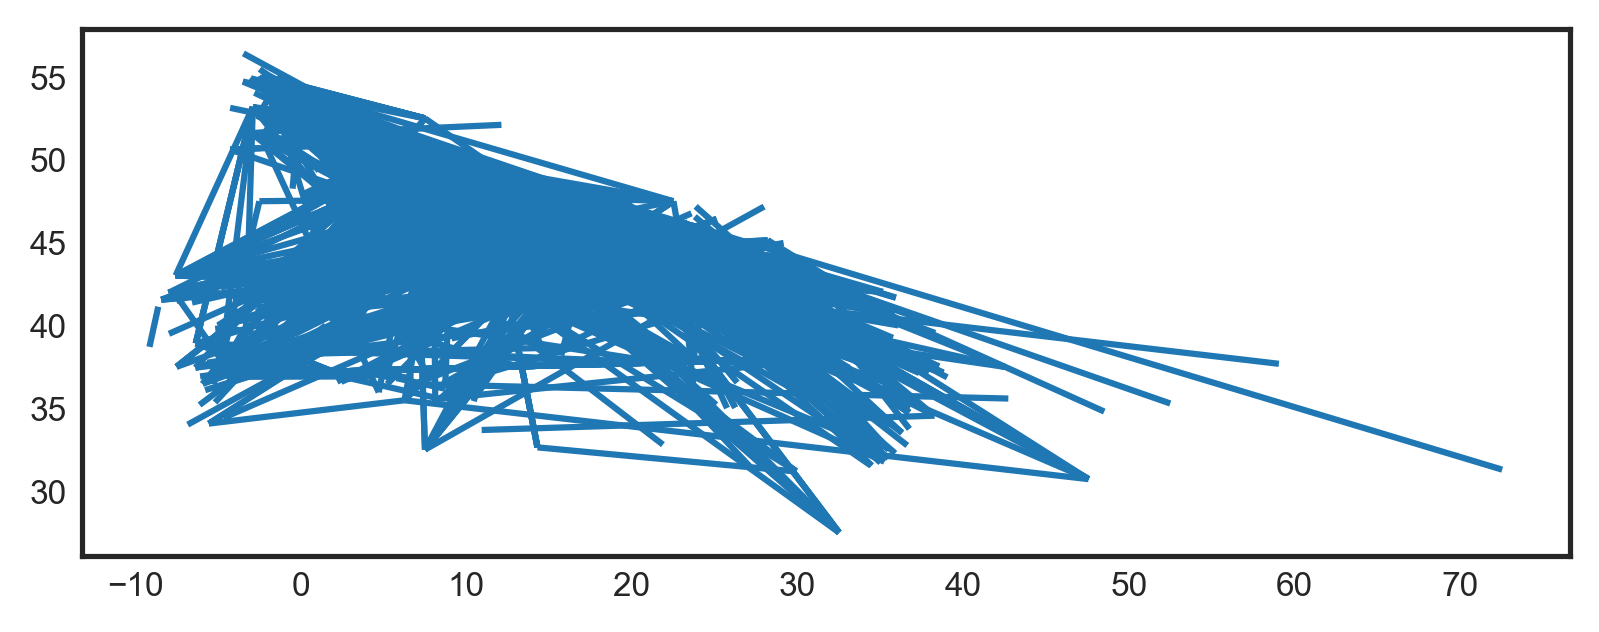

In [18]:
origo_geo.set_geometry('origo_line').plot()

In [19]:
origo_geo.set_geometry('origo_line', inplace=True)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


# Minimal animation with lines

In [20]:
year = 100
keep = 50
list_subset = origo_geo[(origo_geo["random_date"]<=year) & (origo_geo["random_date"]>year-keep)]
list_subset

,Unnamed: 0,id,hd_nr,origo,origo_clean,pleiades_id,pleiades_title_list,pleiades_Latitude,pleiades_Longitude,pleiades_title,...,Link_or_Ref,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,origo_point,geometry,edh_point,random_date,origo_line
7,19634,HD017830/1,HD017830,[---] Classe+?,[---] Classe,393404.0,NaN,44.395293,12.219389,Classis,...,NaN,NaN,NaN,NaN,NaN,POINT (12.219388845 44.3952925594),POINT (12.21939 44.39529),POINT (12.1422 43.9194),69.0,"LINESTRING (12.21939 44.39529, 12.14220 43.91940)"
54,87024,HD075526/1,HD075526,Acele,Acele,393357.0,NaN,45.796556,11.913454,Acelum,...,NaN,NaN,NaN,NaN,NaN,POINT (11.9134537 45.79655645),POINT (11.91345 45.79656),POINT (8.2674 49.9951),76.0,"LINESTRING (11.91345 45.79656, 8.26740 49.99510)"
74,19178,HD017350/27,HD017350,Aequo*,Aequo,197095.0,NaN,43.739278,16.655704,Aequum,...,NaN,NaN,NaN,NaN,NaN,POINT (16.655704 43.739278),POINT (16.65570 43.73928),POINT (27.9423 44.0928),92.0,"LINESTRING (16.65570 43.73928, 27.94230 44.09280)"
76,60654,HD055677/1,HD055677,Aequo+*,Aequo,197095.0,NaN,43.739278,16.655704,Aequum,...,NaN,NaN,NaN,NaN,NaN,POINT (16.655704 43.739278),POINT (16.65570 43.73928),POINT (8.2674 49.9951),94.0,"LINESTRING (16.65570 43.73928, 8.26740 49.99510)"
77,86973,HD075470/1,HD075470,Aequo*,Aequo,197095.0,NaN,43.739278,16.655704,Aequum,...,NaN,NaN,NaN,NaN,NaN,POINT (16.655704 43.739278),POINT (16.65570 43.73928),POINT (8.2674 49.9951),97.0,"LINESTRING (16.65570 43.73928, 8.26740 49.99510)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,60852,HD056026/1,HD056026,Viruno,Viruno,197583.0,NaN,46.699615,14.364777,Virunum,...,NaN,NaN,NaN,NaN,NaN,POINT (14.3647773 46.6996149),POINT (14.36478 46.69961),POINT (8.2674 49.9951),96.0,"LINESTRING (14.36478 46.69961, 8.26740 49.99510)"
2551,61034,HD056196/1,HD056196,Viruno,Viruno,197583.0,NaN,46.699615,14.364777,Virunum,...,NaN,NaN,NaN,NaN,NaN,POINT (14.3647773 46.6996149),POINT (14.36478 46.69961),POINT (8.2674 49.9951),72.0,"LINESTRING (14.36478 46.69961, 8.26740 49.99510)"
2553,87464,HD075829/1,HD075829,Viruno,Viruno,197583.0,NaN,46.699615,14.364777,Virunum,...,NaN,NaN,NaN,NaN,NaN,POINT (14.3647773 46.6996149),POINT (14.36478 46.69961),POINT (6.868 51.0651),90.0,"LINESTRING (14.36478 46.69961, 6.86800 51.06510)"
2554,89035,HD077439/1,HD077439,Viruni (= Viruno),Viruno,197583.0,NaN,46.699615,14.364777,Virunum,...,NaN,NaN,NaN,NaN,NaN,POINT (14.3647773 46.6996149),POINT (14.36478 46.69961),POINT (8.2674 49.9951),83.0,"LINESTRING (14.36478 46.69961, 8.26740 49.99510)"


/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been dis

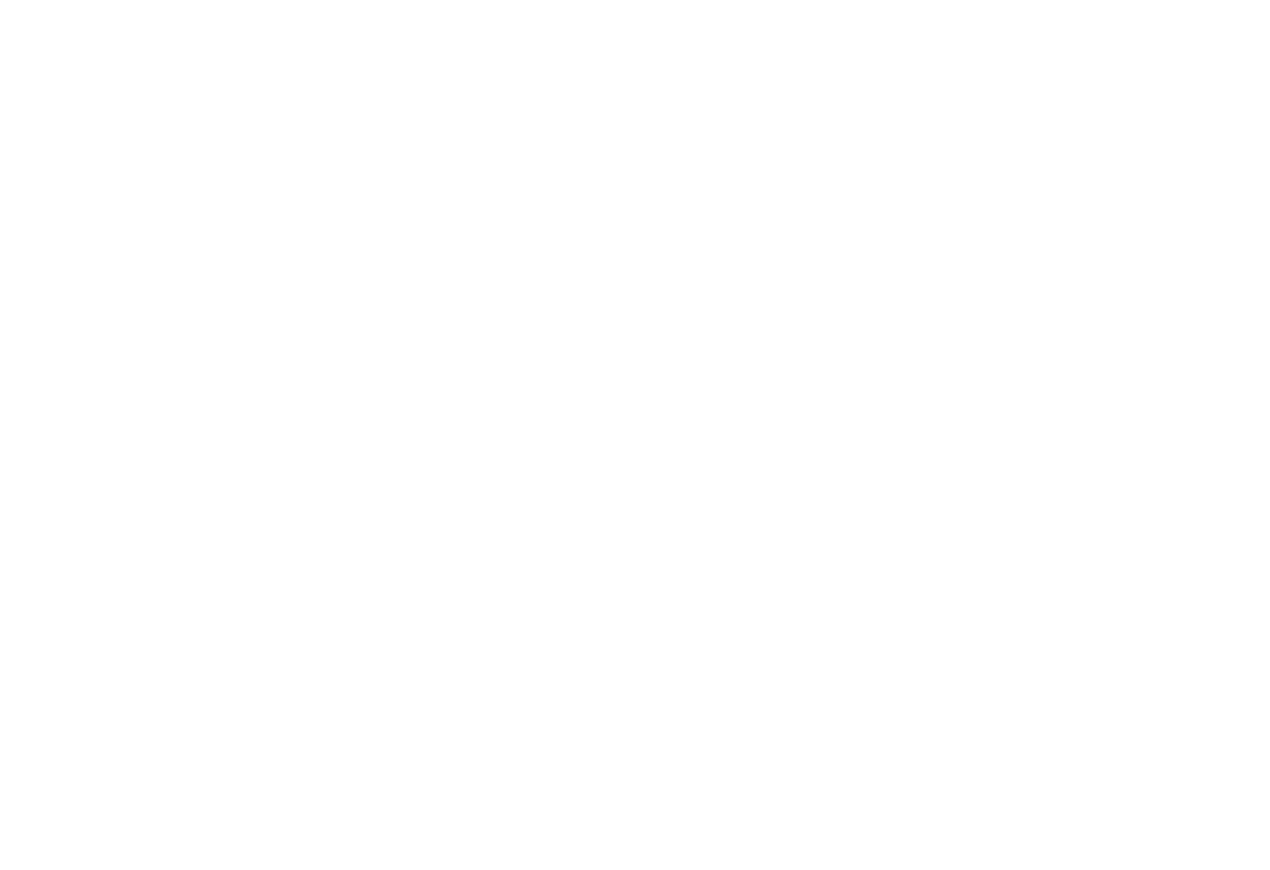

In [31]:
keep=50

fig = plt.figure(figsize=(5.2, 3), dpi=300, tight_layout=True)
ax = plt.axes()
ax.set_axis_off()
ax.set_xlim(-10,45)


camera = Camera(fig)
for year in range(-100, 400, 5):
    gpd.GeoSeries(pleiades_regions_merged).plot(ax=ax, color="lightgray")
    list_subset = origo_geo[(origo_geo["random_date"]<=year) & (origo_geo["random_date"]>year-keep)]
    list_subset.plot(ax=ax)
    ax.text(30,55, str(year), fontsize=6, color="black")
    camera.snap()
animation = camera.animate()
animation.save('../data/anim1_lines.gif')

# Lines into points

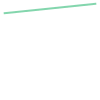

In [21]:
line = origo_geo["origo_line"].values[0] #should work also with paths, not only direct lines
line

In [22]:
type(line)

shapely.geometry.linestring.LineString

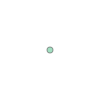

In [23]:
line.interpolate(0.9)

In [24]:
interpolated = MultiPoint([line.interpolate((i/10), normalized=True) for i in range(1, 10)])

In [25]:
n_segments = 100
segments = [LineString([line.interpolate((i/n_segments), normalized=True), line.interpolate((i+1/n_segments), normalized=True)]) for i in range(0, n_segments)]
cm = plt.get_cmap('coolwarm')
color_vals = list(cm([val/n_segments for val in range(n_segments)]))

In [26]:
segments_df = gpd.GeoDataFrame({"geometry": segments, "color" : color_vals})

<AxesSubplot: >

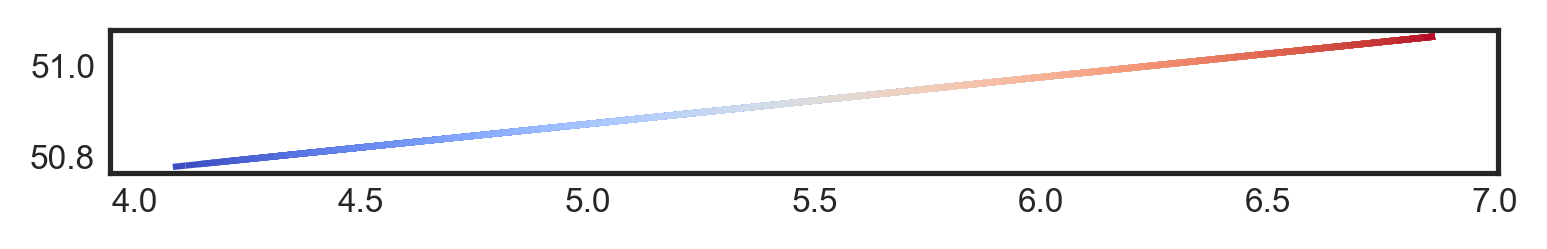

In [27]:
fig = plt.figure(figsize=(5.2, 3), dpi=300, tight_layout=True)
ax = plt.axes()

segments_df.plot(color=segments_df["color"], ax=ax)

# point data with random color and fast beginning and end

In [28]:
origo_geo["random_date"] = origo_geo["random_date"].astype(int)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [29]:
origo_points_list = []
step_len = 5
age = 50
for n in range(len(origo_geo)):
    line = origo_geo.iloc[n]["origo_line"]
    year = origo_geo.iloc[n]["random_date"]
    color = random.choice(list(mcolors.TABLEAU_COLORS.keys()))
    dates = range(year-age+step_len,year+step_len, step_len)
    for i,y in enumerate(dates):
        data = {
            "date": y,
            "geometry" : Point(line.interpolate((i/len(dates)), normalized=True)),
            "color" : color
        }
        origo_points_list.append(data)

# point data with random color with waiting at the beginning and end


In [30]:
n = 0
line = origo_geo.iloc[n]["origo_line"]
line = origo_geo.iloc[n]["origo_line"]
year = origo_geo.iloc[n]["random_date"]
color = random.choice(list(mcolors.TABLEAU_COLORS.keys()))
dates = range(year-age+step_len,year+step_len, step_len)
print(Point(line.interpolate(0.12, normalized=True)))

POINT (4.418756204452 50.812006359288)


In [31]:
[Point(line.interpolate((i/(len(dates)-2)), normalized=True)) for i in range(len(dates) - 2)]

In [32]:
colors = [random.choice(list(mcolors.TABLEAU_COLORS.keys()))] * len(dates)
colors

['tab:cyan',
 'tab:cyan',
 'tab:cyan',
 'tab:cyan',
 'tab:cyan',
 'tab:cyan',
 'tab:cyan',
 'tab:cyan',
 'tab:cyan',
 'tab:cyan']

In [33]:
all_dates = []
all_points = []
all_colors = []
step_len = 5
age = 50
for n in range(len(origo_geo)):
    line = origo_geo.iloc[n]["origo_line"]
    year = origo_geo.iloc[n]["random_date"]
    colors = [random.choice(list(mcolors.TABLEAU_COLORS.keys()))] * len(dates)
    dates = range(year-age+step_len,year+step_len, step_len)
    points = [Point(line.interpolate((i/(len(dates)-3)), normalized=True)) for i in range(len(dates) - 2)]
    points = [origo_geo.iloc[n]["origo_point"]] + points +  [origo_geo.iloc[n]["edh_point"]]
    all_dates.extend(dates)
    all_points.extend(points)
    all_colors.extend(colors)

In [34]:
origo_linepoints_gdf = gpd.GeoDataFrame({"date" : all_dates, "geometry" : all_points, "color" : all_colors})
origo_linepoints_gdf

,date,geometry,color
0,331,POINT (4.08477 50.77749),tab:olive
1,336,POINT (4.08477 50.77749),tab:olive
2,341,POINT (4.48237 50.81858),tab:olive
3,346,POINT (4.87998 50.85967),tab:olive
4,351,POINT (5.27758 50.90075),tab:olive
...,...,...,...
16305,76,POINT (5.86397 41.30232),tab:cyan
16306,81,POINT (8.71868 43.10968),tab:cyan
16307,86,POINT (11.57339 44.91704),tab:cyan
16308,91,POINT (14.42810 46.72440),tab:cyan


MovieWriter ffmpeg unavailable; using Pillow instead.


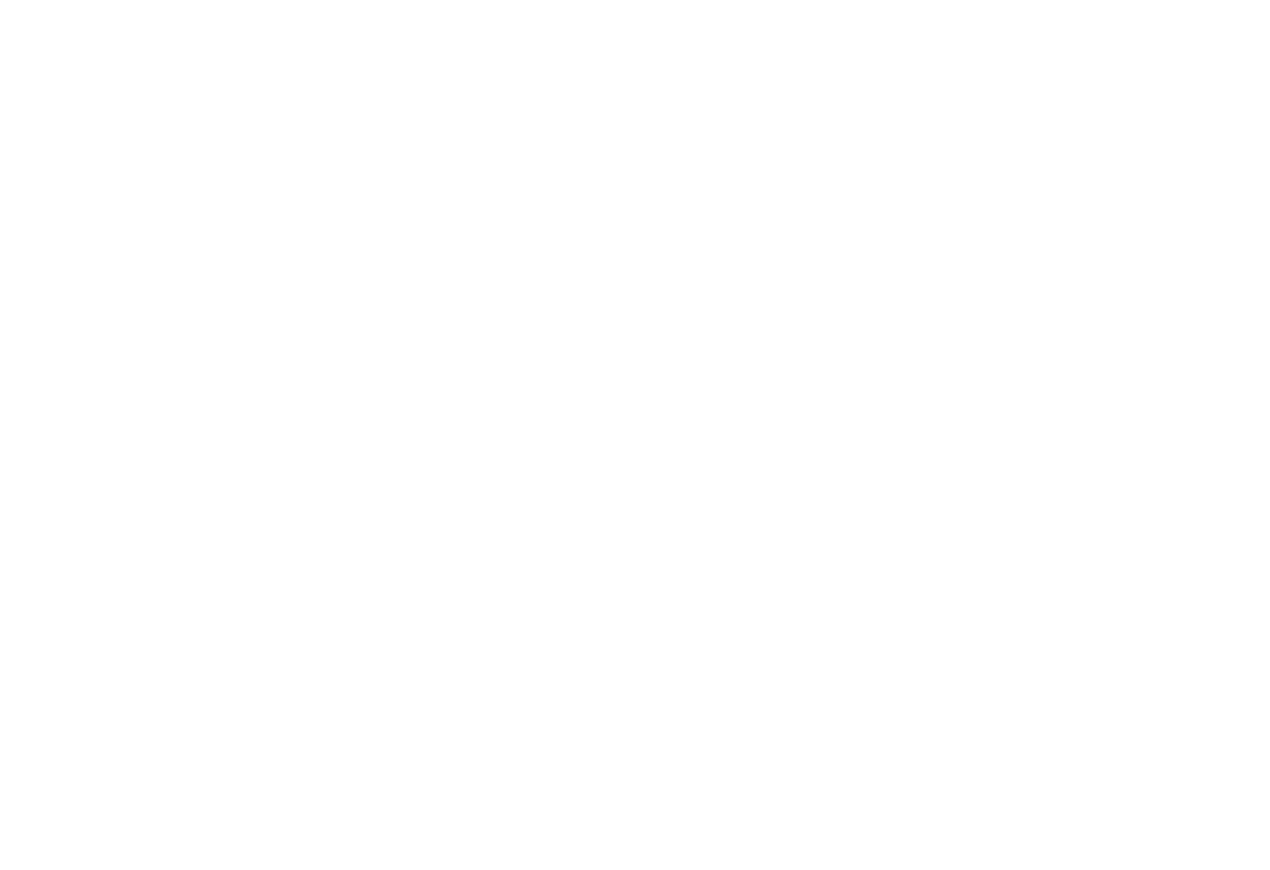

In [49]:
fig = plt.figure(figsize=(5.2, 3), dpi=300, tight_layout=True)
ax = plt.axes()
ax.set_axis_off()
ax.set_xlim(-10,45)
step = 5

camera = Camera(fig)
for year in range(-50, 450, step):
    gpd.GeoSeries(pleiades_regions_merged).plot(ax=ax, color="lightgray")
    list_subset = origo_linepoints_gdf[origo_linepoints_gdf["date"].between(year-4, year)]
    list_subset.plot(ax=ax, markersize=1, color=list_subset["color"])
    ax.text(30,55, str(year), fontsize=6, color="black")
    camera.snap()
animation = camera.animate()
animation.save('../data/anim1_linepoints.gif')

# Data for background lines

<AxesSubplot: >

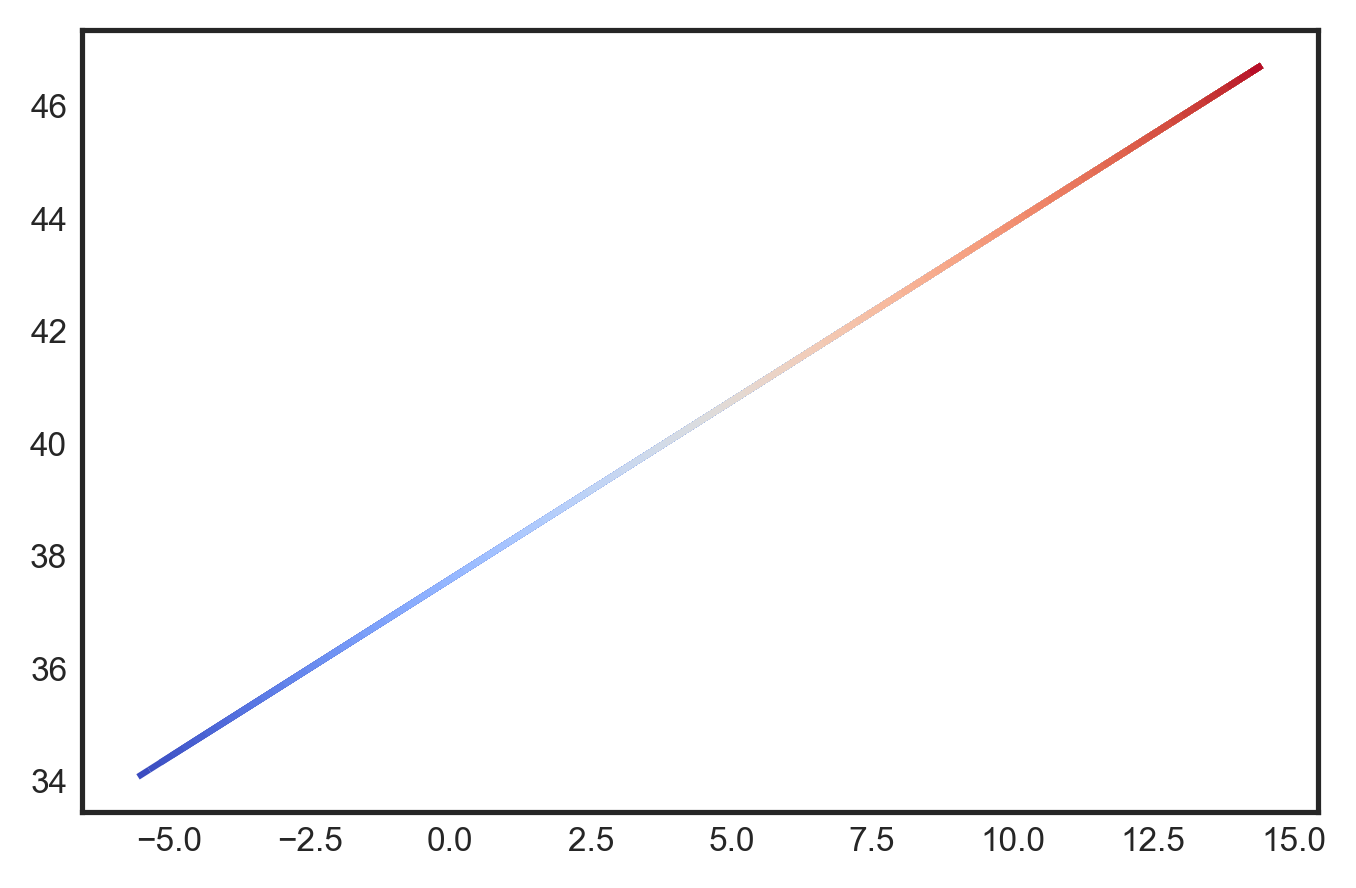

In [35]:
n_segments = 100
segments = [LineString(
    [line.interpolate((i / n_segments), normalized=True), line.interpolate((i + 1 / n_segments), normalized=True)]) for
            i in range(0, n_segments)]
cm = plt.get_cmap('coolwarm')
color_vals = list(cm([val / n_segments for val in range(n_segments)]))
segments_df = gpd.GeoDataFrame({"geometry": segments, "color": color_vals})
fig = plt.figure(figsize=(5.2, 3), dpi=300, tight_layout=True)
ax = plt.axes()

segments_df.plot(color=segments_df["color"], ax=ax)

In [36]:
n_segments = 50
cm = plt.get_cmap('coolwarm')
color_vals = list(cm([(val / n_segments) for val in range(n_segments)]))

In [37]:
len(origo_geo)

1631

In [38]:
n_segments = 50
all_years = []
all_segments = []
all_colors = []
for n in range(len(origo_geo)):
    line = origo_geo.iloc[n]["origo_line"]
    segments = [LineString([line.interpolate((i / n_segments), normalized=True), line.interpolate(((i + 1) / n_segments), normalized=True)]) for i in range(0, n_segments)]
    years = [origo_geo.iloc[n]["random_date"]] * len(segments)
    all_years.extend(years)
    all_segments.extend(segments)
    all_colors.extend(color_vals)

segmentlines_df = gpd.GeoDataFrame({"year": all_years,
                                    "color" : all_colors,
                                    "geometry" : all_segments})

<AxesSubplot: >

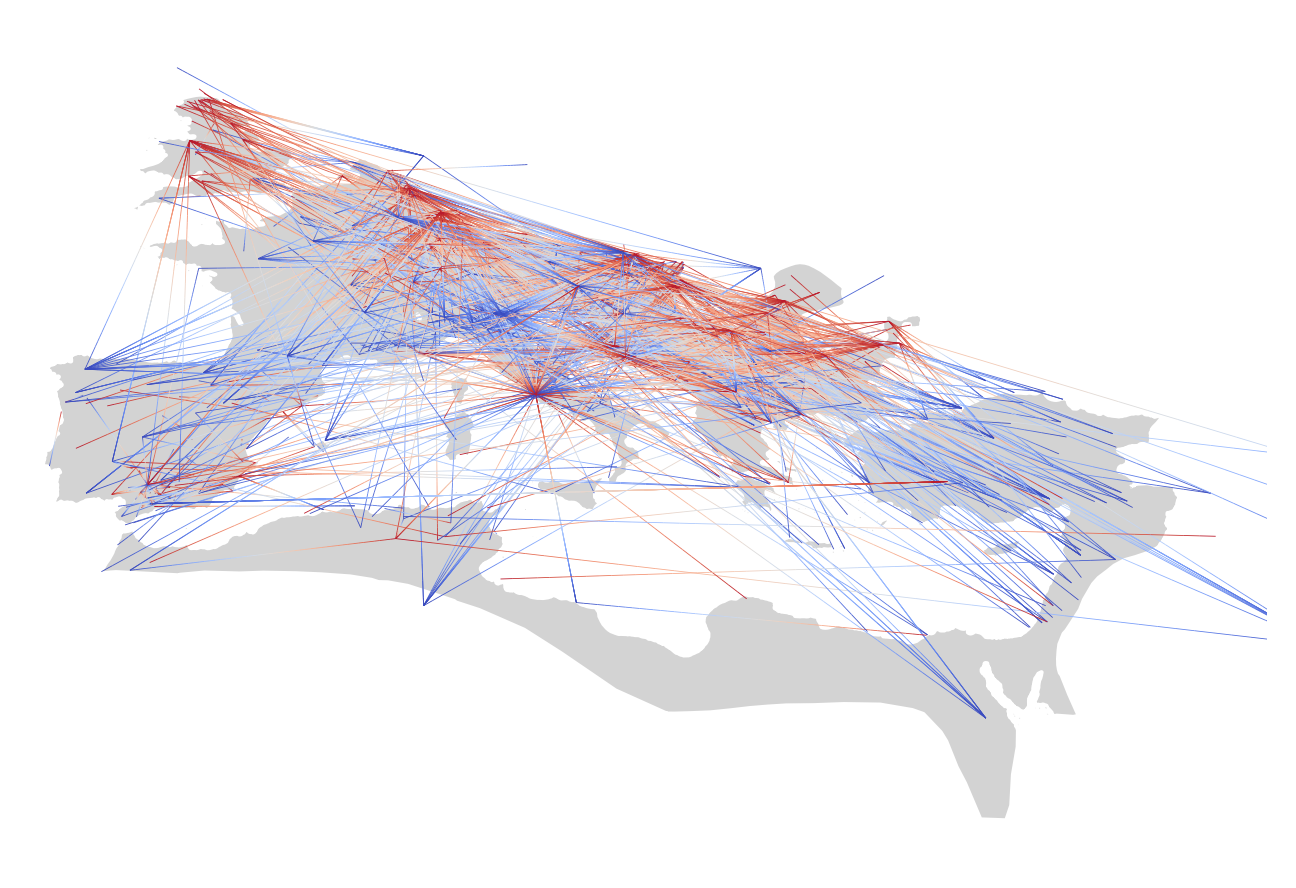

In [39]:
fig, ax = plt.subplots(figsize=(5.2, 3), dpi=300, tight_layout=True)
gpd.GeoSeries(pleiades_regions_merged).plot(ax=ax, color="lightgray")
#GIST.plot()
ax.set_xlim(-10, 45)
ax.set_axis_off()
segmentlines_df.plot(color=segmentlines_df["color"], linewidth=0.2, ax=ax)

MovieWriter ffmpeg unavailable; using Pillow instead.


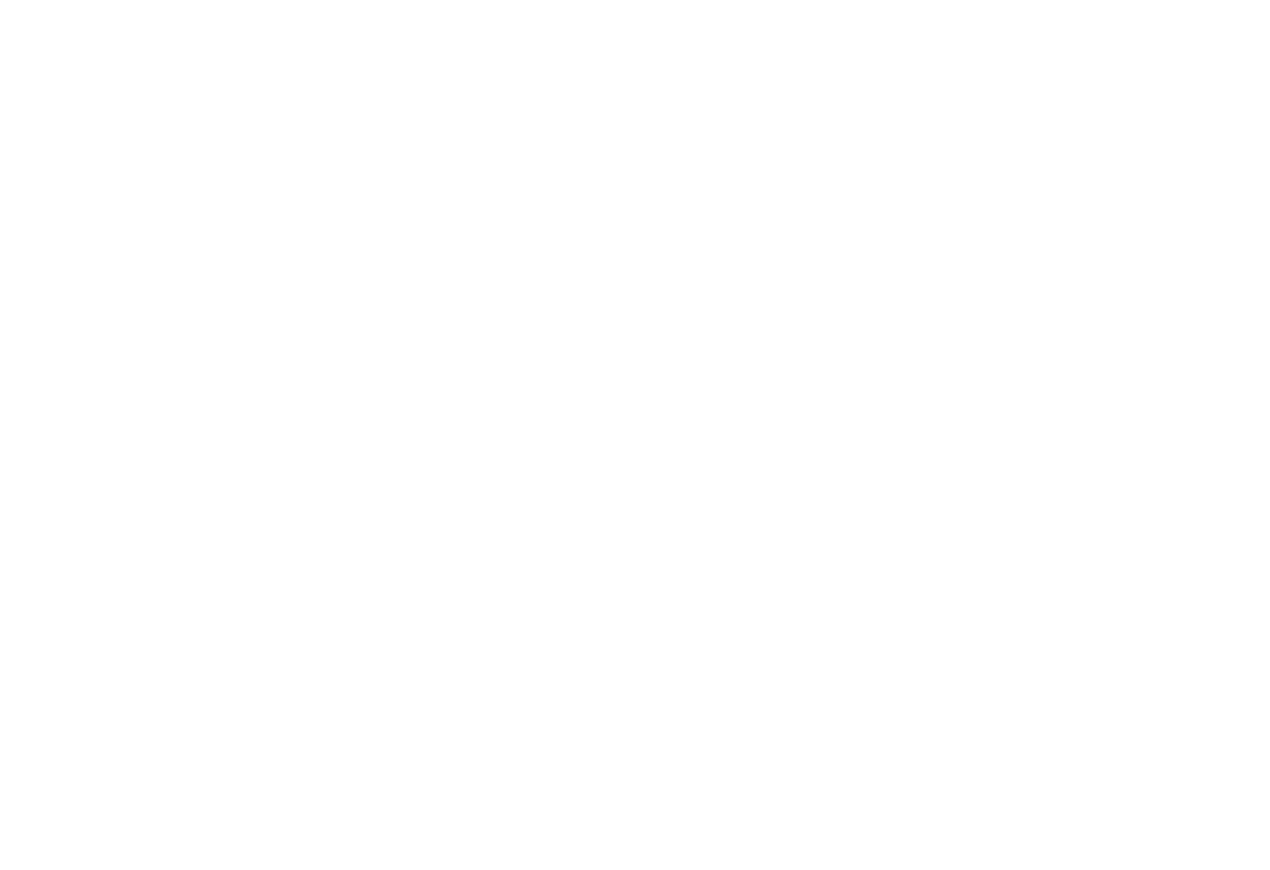

In [61]:
keep=50

fig = plt.figure(figsize=(5.2, 3), dpi=300, tight_layout=True)
ax = plt.axes()
ax.set_axis_off()
ax.set_xlim(-10,45)

camera = Camera(fig)
for year in range(100, 200, 5):
    gpd.GeoSeries(pleiades_regions_merged).plot(ax=ax, color="lightgray")
    list_subset = segmentlines_df[(segmentlines_df["year"]<=year) & (segmentlines_df["year"]>year-keep)]
    list_subset.plot(ax=ax, color=list_subset["color"], linewidth=0.2)
    ax.text(30,55, str(year), fontsize=6, color="black")
    camera.snap()
animation = camera.animate()
animation.save('../data/anim3_linesegments.gif')

# Points with changing color

In [40]:
points_n = 10
line = origo_geo.iloc[0]["origo_line"]
print(line)

LINESTRING (4.08476841415 50.7774935901, 6.868 51.0651)


In [41]:
print(Point(line.interpolate(1, normalized=True)))

POINT (6.868 51.0651)


In [42]:
points = [Point(line.interpolate((i / (points_n-1)), normalized=True)) for i in range(0,points_n)]
for point in points:
    print(point)

POINT (4.08476841415 50.7774935901)
POINT (4.394016368133333 50.80944985786667)
POINT (4.703264322116667 50.841406125633334)
POINT (5.0125122761 50.8733623934)
POINT (5.321760230083333 50.90531866116667)
POINT (5.631008184066667 50.937274928933334)
POINT (5.94025613805 50.9692311967)
POINT (6.249504092033334 51.00118746446667)
POINT (6.558752046016666 51.033143732233334)
POINT (6.868 51.0651)


In [43]:
markersizes = np.ones(10)
markersizes[0], markersizes[-1] = 3, 3

In [44]:
points_n = 50
cm = plt.get_cmap('coolwarm')
colors = list(cm([1 - (val / points_n) for val in range(points_n)]))
markersizes = np.ones(points_n)
markersizes[0], markersizes[-1] = 3, 3
all_dates = []
all_points = []
all_colors = []
all_markersizes = []
step_len = 1
age = 50
for n in range(len(origo_geo)):
    line = origo_geo.iloc[n]["origo_line"]
    year = origo_geo.iloc[n]["random_date"]
    dates = range(year - age + step_len, year + step_len, step_len)
    points = [Point(line.interpolate((i / (points_n-1)), normalized=True)) for i in range(0,points_n)]
    all_dates.extend(dates)
    all_points.extend(points)
    all_colors.extend(colors)
    all_markersizes.extend(markersizes)
origo_linepoints_gdf = gpd.GeoDataFrame({"date": all_dates, "geometry": all_points, "color": all_colors, "markersize" : all_markersizes})
origo_linepoints_gdf

,date,geometry,color,markersize
0,327,POINT (4.08477 50.77749),"[0.705673158, 0.01555616, 0.150232812, 1.0]",3.0
1,328,POINT (4.14157 50.78336),"[0.7350766252941177, 0.10445963105882351, 0.17...",1.0
2,329,POINT (4.19837 50.78923),"[0.763520395627451, 0.17866744737254903, 0.193...",1.0
3,330,POINT (4.25517 50.79510),"[0.7905615319411765, 0.23139699905882352, 0.21...",1.0
4,331,POINT (4.31197 50.80097),"[0.8155083866078432, 0.2777809871764706, 0.240...",1.0
...,...,...,...,...
81545,92,POINT (12.79684 45.69162),"[0.34832334141176474, 0.4657111465098039, 0.88...",1.0
81546,93,POINT (13.20465 45.94982),"[0.32371841525490197, 0.4331584405490196, 0.86...",1.0
81547,94,POINT (13.61247 46.20801),"[0.2994412594117647, 0.40024818329411765, 0.83...",1.0
81548,95,POINT (14.02028 46.46621),"[0.27582712294117645, 0.36671691552941177, 0.8...",1.0


In [45]:
len(origo_linepoints_gdf)

81550

In [46]:
origo_linepoints_gdf.to_parquet("../data/origo_linepoints_gdf.parquet")

In [47]:
year = 50
segmentlines_subset = segmentlines_df[(segmentlines_df["year"]>=year) & (segmentlines_df["year"]<year+keep)]
segmentlines_subset

,year,color,geometry
300,69,"[0.2298057, 0.298717966, 0.753683153, 1.0]","LINESTRING (12.21939 44.39529, 12.21785 44.38577)"
301,69,"[0.2526625972549019, 0.3328367876470588, 0.783...","LINESTRING (12.21785 44.38577, 12.21630 44.37626)"
302,69,"[0.27582712294117645, 0.36671691552941177, 0.8...","LINESTRING (12.21630 44.37626, 12.21476 44.36674)"
303,69,"[0.2994412594117647, 0.40024818329411765, 0.83...","LINESTRING (12.21476 44.36674, 12.21321 44.35722)"
304,69,"[0.32371841525490197, 0.4331584405490196, 0.86...","LINESTRING (12.21321 44.35722, 12.21167 44.34770)"
...,...,...,...
81545,96,"[0.8393649370784314, 0.32185622094117644, 0.26...","LINESTRING (12.42980 45.45925, 12.82946 45.71228)"
81546,96,"[0.8155083866078432, 0.2777809871764706, 0.240...","LINESTRING (12.82946 45.71228, 13.22912 45.96531)"
81547,96,"[0.7905615319411765, 0.23139699905882352, 0.21...","LINESTRING (13.22912 45.96531, 13.62878 46.21834)"
81548,96,"[0.763520395627451, 0.17866744737254903, 0.193...","LINESTRING (13.62878 46.21834, 14.02844 46.47137)"


MovieWriter ffmpeg unavailable; using Pillow instead.


CPU times: user 55min 30s, sys: 18.4 s, total: 55min 49s
Wall time: 56min 12s


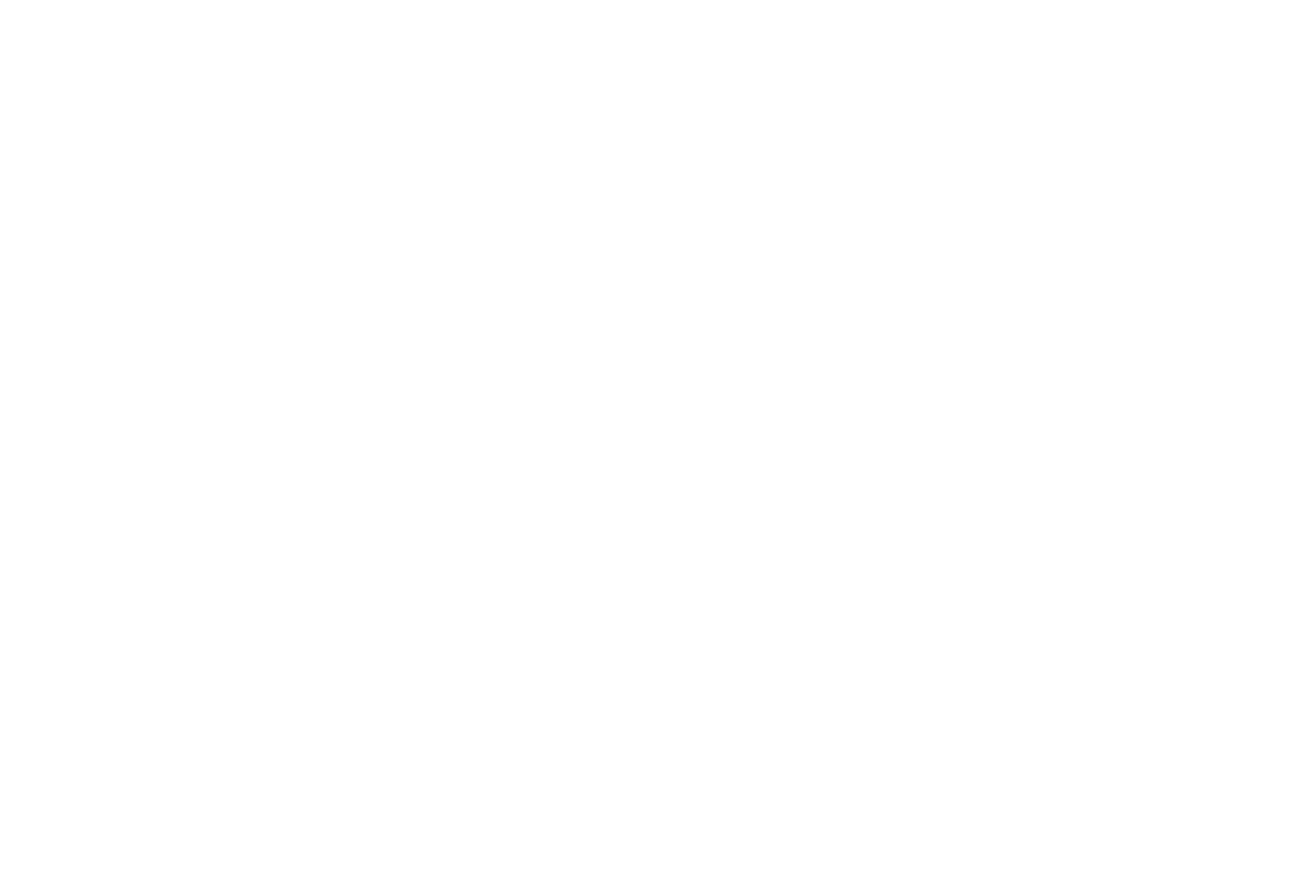

In [48]:
%%time
keep=50

fig = plt.figure(figsize=(5.2, 3), dpi=300, tight_layout=True)
ax = plt.axes()
ax.set_axis_off()
ax.set_xlim(-10,45)


camera = Camera(fig)
for year in range(-100, 400, 2):
    # lines
    gpd.GeoSeries(pleiades_regions_merged).plot(ax=ax, color="lightgray")
    segmentlines_subset = segmentlines_df[(segmentlines_df["year"]>=year) & (segmentlines_df["year"]<year+keep)]
    segmentlines_subset.plot(ax=ax, color=segmentlines_subset["color"], linewidth=0.2)
    # moving points
    linepoints_subset = origo_linepoints_gdf[origo_linepoints_gdf["date"]==year]
    linepoints_subset.plot(ax=ax, color=linepoints_subset["color"], markersize=linepoints_subset["markersize"])
    # staying dots
    sourcedest_subset = origo_geo[origo_geo["random_date"]<=year]
    sourcedest_subset.set_geometry("origo_point").plot(color="darkblue", markersize=1, alpha=0.3, ax=ax)
    sourcedest_subset.set_geometry("edh_point").plot(color="darkred", markersize=1, alpha=0.3, ax=ax)
    ax.text(30,55, str(year), fontsize=12, color="black")
    camera.snap()
animation = camera.animate()
animation.save('../data/anim4_linesegments+points.gif')

In [ ]:
# next option might be: https://pydeck.gl
#see example here: https://pydeck.gl/gallery/arc_layer.html
# or https://pydeck.gl/gallery/great_circle_layer.html


# On Orbis network

In [ ]:
G = nx.read_graphml("../data/orbis_network_enriched.graphml")

In [ ]:
G.edges(data=True)

# Adela's data

In [ ]:
orig_dest155 = gpd.read_file("../data/orig_dest155.geojson", driver="GeoJSON")

In [ ]:
orig_dest155.plot()

In [ ]:
# - start with simple space-abstracted animation of dots moving from origo to destintion
# - in a next step, we will move it to Orbis


In [30]:
origo_points_list = []
step_len = 5
age = 50
for n in range(len(origo_geo)):
    line = origo_geo.iloc[n]["origo_line"]
    year = origo_geo.iloc[n]["random_date"]
    color = random.choice(list(mcolors.TABLEAU_COLORS.keys()))
    dates = range(year-age+step_len,year+step_len, step_len)
    for i,y in enumerate(dates):
        data = {
            "date": y,
            "geometry" : Point(line.interpolate((i/len(dates)), normalized=True)),
            "color" : color
        }
        origo_points_list.append(data)

In [31]:
origo_geo

,LIST-ID,EDCS-ID,EDH-ID,trismegistos_uri,pleiades_id,transcription,inscription,clean_text_conservative,clean_text_interpretive_sentence,clean_text_interpretive_word,...,urban_context_city,urban_context_pop_est,withinRE?,type_of_inscription_auto,type_of_inscription_auto_prob,edh_point,random_dates,random_date,origo_point,origo_line
445538,445539,EDCS-24900101,HD064259,https://www.trismegistos.org/text/178228,,N(umerius) &lt;G=C&gt;ranonius N(umeri) f(iliu...,N(umerius) Granonius N(umeri) f(ilius) <G=C>al...,N lt C gt ranonius N f Cal domo Luceria IIII v...,Numerius lt;G gt;ranonius Numeri filius Cal do...,Numerius lt G gt ranonius Numeri filius Cal do...,...,Athenae,58112.0,True,None,0.0,POINT (23.728 37.984),"[-17, -29, -3, -24, -2, -11, -12, -24, -19, 8]",-17,POINT (15.3354745 41.5086475),"LINESTRING (15.33547 41.50865, 23.72798 37.98415)"
445571,445572,EDCS-11700037,HD019463,https://www.trismegistos.org/text/177113,,[---] Viruno / [--- v]ixit / [------,] Viruno / [3 v]ixit / [,Viruno ixit,Viruno vixit,Viruno vixit,...,Athenae,58112.0,True,epitaph,1.0,POINT (23.728 37.984),"[125, 125, 121, 122, 127, 125, 124, 126, 121, ...",125,POINT (14.3647773 46.6996149),"LINESTRING (14.36478 46.69961, 23.72798 37.98415)"
445574,445575,EDCS-11700044,HD013721,https://www.trismegistos.org/text/177091,,C(aio) Mucio C(ai) f(ilio) Cla/udio Gemenel(l)...,G(aio!) Mucio G(ai!) f(ilio) Cla/udio Gemenelo...,C Mucio C f Claudio Gemenelo mathe tr ex class...,Caio Mucio Cai filio Claudio Gemenello mathema...,Caio Mucio Cai filio Claudio Gemenello mathema...,...,Athenae,58112.0,True,epitaph,1.0,POINT (23.728 37.984),"[118, 115, 120, 104, 108, 101, 94, 134, 158, 83]",118,POINT (7.2758295 43.7194725),"LINESTRING (7.27583 43.71947, 23.72798 37.98415)"
446675,446676,EDCS-20700285,HD023339,https://www.trismegistos.org/text/244141,109008,V(ivus) f(ecit) // L(ucius) Ursius / Sosander ...,V(ivus) f(ecit) / L(ucius) Ursius / Sosander /...,V f L Ursius Sosander vestiar Bonon sibi et Ru...,Vivus fecit Lucius Ursius Sosander vestiarius ...,Vivus fecit Lucius Ursius Sosander vestiarius ...,...,None,NaN,True,epitaph,1.0,POINT (1.617 50.717),"[204, 238, 176, 237, 206, 223, 248, 240, 161, ...",204,POINT (10.026149 45.133639),"LINESTRING (10.02615 45.13364, 1.61670 50.71670)"
446733,446734,EDCS-09300905,HD006780,https://www.trismegistos.org/text/264182,423025,Sex(tus) Gracch[ius] / T(iti) f(ilius) Pol(lia...,Sex(tus) Gracchi[us] / T(iti) f(ilius) Pol(lia...,Sex Gracch T f Pol Fronto Faventia miles coh I...,Sextus Gracchius Titi filius Pollia Fronto Fav...,Sextus Gracchius Titi filius Pollia Fronto Fav...,...,Roma,923313.0,True,epitaph,1.0,POINT (12.486 41.892),"[120, 165, 165, 104, 104, 166, 148, 100, 186, ...",120,POINT (11.883507 44.286236),"LINESTRING (11.88351 44.28624, 12.48620 41.89170)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524327,524328,None,HD078033,None,109169,L(ucius) Antest[i]us / M(arci) f(ilius) Ani(en...,None,L Antestus M f Ani Tertius Cremon mil leg an L...,Lucius Antestius Marci filius Aniensis Tertius...,Lucius Antestius Marci filius Aniensis Tertius...,...,Mogontiacum,19930.0,True,epitaph,1.0,POINT (8.267 49.995),"[135, 109, 139, 135, 128, 110, 119, 124, 137, ...",135,POINT (10.026149 45.133639),"LINESTRING (10.02615 45.13364, 8.26740 49.99510)"
524329,524330,None,HD078035,None,109169,------](?) / [---]I(?)M(?)[---] / [---] Tolo[s...,None,IM Tolo eg I st,IM Tolosa legionis IIII stipendiorum,IM Tolosa legionis IIII stipendiorum,...,Mogontiacum,19930.0,True,epitaph,1.0,POINT (8.267 49.995),"[87, 86, 79, 97, 95, 89, 89, 94, 74, 100]",87,POINT (1.443246 43.604175),"LINESTRING (1.44325 43.60417, 8.26740 49.99510)"
524342,524343,None,HD078058,None,109169,[------] / Atinius / Sept&lt;i&gt;mi / f(ilius...,None,Atinius Sept lt i gt mi f Romilia Ateste mil l...,Atinius Sept lt;i gt;mi filius Romilia Ateste ...,Atinius Sept lt i gt mi filius Romilia Ateste ...,...,Mogontiacum,19930.0,True,epitaph,1.0,POINT (8.267

In [32]:
gpd.GeoDataFrame(origo_points_list)

,date,geometry,color
0,-62,POINT (15.33547 41.50865),tab:cyan
1,-57,POINT (16.17473 41.15620),tab:cyan
2,-52,POINT (17.01398 40.80375),tab:cyan
3,-47,POINT (17.85323 40.45130),tab:cyan
4,-42,POINT (18.69248 40.09885),tab:cyan
...,...,...,...
5235,93,POINT (8.95808 46.26624),tab:pink
5236,98,POINT (8.81017 46.50897),tab:pink
5237,103,POINT (8.66225 46.75171),tab:pink
5238,108,POINT (8.51433 46.99444),tab:pink


In [33]:
origo_points_list

[{'date': -62,
  'geometry': <shapely.geometry.point.Point at 0x2b7471d30>,
  'color': 'tab:cyan'},
 {'date': -57,
  'geometry': <shapely.geometry.point.Point at 0x2b771a820>,
  'color': 'tab:cyan'},
 {'date': -52,
  'geometry': <shapely.geometry.point.Point at 0x2b771a1c0>,
  'color': 'tab:cyan'},
 {'date': -47,
  'geometry': <shapely.geometry.point.Point at 0x2b771a5b0>,
  'color': 'tab:cyan'},
 {'date': -42,
  'geometry': <shapely.geometry.point.Point at 0x2b771a5e0>,
  'color': 'tab:cyan'},
 {'date': -37,
  'geometry': <shapely.geometry.point.Point at 0x2b793c850>,
  'color': 'tab:cyan'},
 {'date': -32,
  'geometry': <shapely.geometry.point.Point at 0x2b771aaf0>,
  'color': 'tab:cyan'},
 {'date': -27,
  'geometry': <shapely.geometry.point.Point at 0x2b771ae20>,
  'color': 'tab:cyan'},
 {'date': -22,
  'geometry': <shapely.geometry.point.Point at 0x2b771aca0>,
  'color': 'tab:cyan'},
 {'date': -17,
  'geometry': <shapely.geometry.point.Point at 0x2b771a910>,
  'color': 'tab:cyan'},


In [34]:
n = 0
line = origo_geo.iloc[n]["origo_line"]
line = origo_geo.iloc[n]["origo_line"]
year = origo_geo.iloc[n]["random_date"]
color = random.choice(list(mcolors.TABLEAU_COLORS.keys()))
dates = range(year-age+step_len,year+step_len, step_len)
print(Point(line.interpolate(0.12, normalized=True)))

POINT (16.342575676 41.085707716)


In [35]:
[Point(line.interpolate((i/(len(dates)-2)), normalized=True)) for i in range(len(dates) - 2)]

In [53]:
[Point(line.split((i/(len(dates)-2)), normalized=True)) for i in range(len(dates) - 2)]


AttributeError: 'LineString' object has no attribute 'split'

In [36]:
colors = [random.choice(list(mcolors.TABLEAU_COLORS.keys()))] * len(dates)
colors

['tab:purple',
 'tab:purple',
 'tab:purple',
 'tab:purple',
 'tab:purple',
 'tab:purple',
 'tab:purple',
 'tab:purple',
 'tab:purple',
 'tab:purple']

In [37]:
all_dates = []
all_points = []
all_colors = []
step_len = 5
age = 50
for n in range(len(origo_geo)):
    line = origo_geo.iloc[n]["origo_line"]
    year = origo_geo.iloc[n]["random_date"]
    colors = [random.choice(list(mcolors.TABLEAU_COLORS.keys()))] * len(dates)
    dates = range(year-age+step_len,year+step_len, step_len)
    points = [Point(line.interpolate((i/(len(dates)-3)), normalized=True)) for i in range(len(dates) - 2)]
    points = [origo_geo.iloc[n]["origo_point"]] + points +  [origo_geo.iloc[n]["edh_point"]]
    all_dates.extend(dates)
    all_points.extend(points)
    all_colors.extend(colors)

In [38]:
origo_linepoints_gdf = gpd.GeoDataFrame({"date" : all_dates, "geometry" : all_points, "color" : all_colors})
origo_linepoints_gdf

,date,geometry,color
0,-62,POINT (15.33547 41.50865),tab:pink
1,-57,POINT (15.33547 41.50865),tab:pink
2,-52,POINT (16.53440 41.00515),tab:pink
3,-47,POINT (17.73333 40.50165),tab:pink
4,-42,POINT (18.93226 39.99815),tab:pink
...,...,...,...
5235,93,POINT (8.85243 46.43962),tab:purple
5236,98,POINT (8.64112 46.78638),tab:purple
5237,103,POINT (8.42981 47.13314),tab:purple
5238,108,POINT (8.21850 47.47990),tab:purple


MovieWriter ffmpeg unavailable; using Pillow instead.


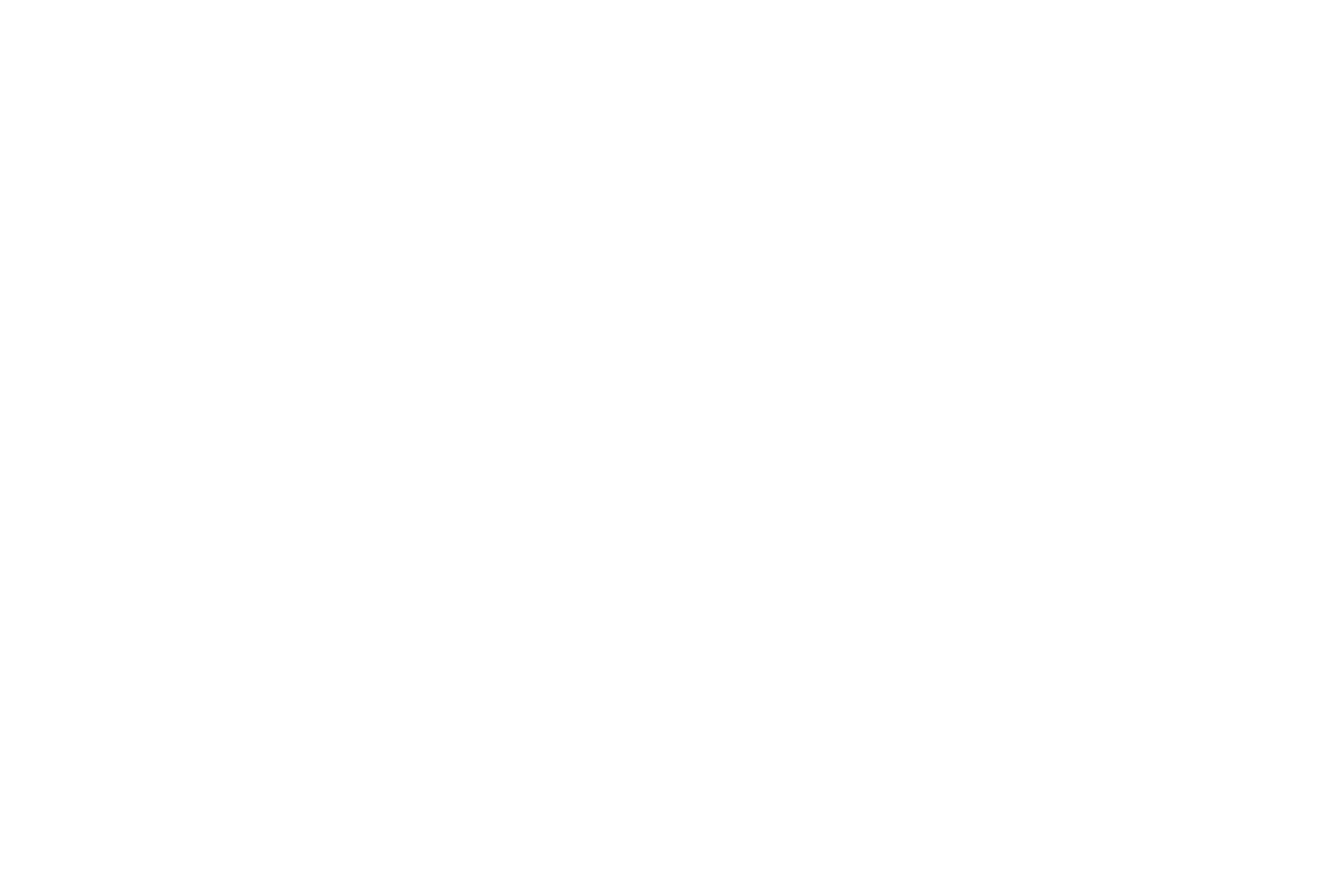

In [96]:
fig = plt.figure(figsize=(5.2, 3), dpi=300, tight_layout=True)
ax = plt.axes()
ax.set_axis_off()
ax.set_xlim(-10,45)
step = 5

camera = Camera(fig)
for year in range(-50, 450, step):
    gpd.GeoSeries(pleiades_regions_merged).plot(ax=ax, color="lightgray")
    list_subset = origo_linepoints_gdf[origo_linepoints_gdf["date"].between(year-4, year)]
    list_subset.plot(ax=ax, markersize=1, color=list_subset["color"])
    ax.text(30,55, str(year), fontsize=6, color="black")
    camera.snap()
animation = camera.animate()
animation.save('../data/anim1_linepoints.gif')

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

x = np.linspace(0, 3 * np.pi, 500)
y = np.sin(x)
dydx = np.cos(0.5 * (x[:-1] + x[1:]))  # first derivative

In [71]:
x = np.linspace(0, 3 * np.pi, 500)
y = np.sin(x)
dydx = np.cos(0.5 * (x[:-1] + x[1:]))

array([ 9.99955409e-01,  9.99598704e-01,  9.98885422e-01,  9.97815817e-01,
        9.96390270e-01,  9.94609290e-01,  9.92473513e-01,  9.89983699e-01,
        9.87140738e-01,  9.83945644e-01,  9.80399556e-01,  9.76503739e-01,
        9.72259583e-01,  9.67668602e-01,  9.62732434e-01,  9.57452839e-01,
        9.51831701e-01,  9.45871024e-01,  9.39572937e-01,  9.32939684e-01,
        9.25973632e-01,  9.18677266e-01,  9.11053189e-01,  9.03104121e-01,
        8.94832897e-01,  8.86242467e-01,  8.77335896e-01,  8.68116362e-01,
        8.58587152e-01,  8.48751667e-01,  8.38613415e-01,  8.28176011e-01,
        8.17443181e-01,  8.06418751e-01,  7.95106655e-01,  7.83510928e-01,
        7.71635707e-01,  7.59485227e-01,  7.47063824e-01,  7.34375927e-01,
        7.21426063e-01,  7.08218851e-01,  6.94759004e-01,  6.81051321e-01,
        6.67100693e-01,  6.52912097e-01,  6.38490593e-01,  6.23841327e-01,
        6.08969524e-01,  5.93880488e-01,  5.78579603e-01,  5.63072327e-01,
        5.47364192e-01,  

In [ ]:

# Create a set of line segments so that we can color them individually
# This creates the points as an N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[0].add_collection(lc)
fig.colorbar(line, ax=axs[0])

# Use a boundary norm instead
cmap = ListedColormap(['r', 'g', 'b'])
norm = BoundaryNorm([-1, -0.5, 0.5, 1], cmap.N)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[1].add_collection(lc)
fig.colorbar(line, ax=axs[1])

axs[0].set_xlim(x.min(), x.max())
axs[0].set_ylim(-1.1, 1.1)
plt.show()

In [ ]:
# for lines: https://stackoverflow.com/questions/36074455/python-matplotlib-with-a-line-color-gradient-and-colorbar
colormap = "coolwarm"

In [101]:
year = 150
origo_linepoints_gdf[origo_linepoints_gdf["date"].between(year-4, year)]

,date,geometry,color
44,148,POINT (12.14180 43.26001),tab:pink
80,147,POINT (5.76568 36.82098),tab:red
248,149,POINT (-2.89520 53.18550),tab:pink
497,149,POINT (22.10765 46.00505),tab:green
521,146,POINT (13.47026 43.10549),tab:orange
...,...,...,...
4975,148,POINT (10.40316 42.70489),tab:brown
4983,146,POINT (11.28006 44.22666),tab:green
4994,146,POINT (11.19302 43.97631),tab:pink
5011,149,POINT (13.51607 43.61899),tab:pink


# On Orbis network

In [10]:
G = nx.read_graphml("../data/orbis_network_enriched.graphml")

In [11]:
G.edges(data=True)

EdgeDataView([('50001', '50056', {'km': 54.539, 'expense_inverse': 0.5238344683080146, 'expense': 1.909, 'days': 1.818, 'route_type': 'road/road', 'gravity': 274.4025501875404, 'gravity_inverse': 0.0036442810000000005}), ('50001', '50100', {'km': 50.135, 'expense_inverse': 0.5698005698005698, 'expense': 1.755, 'days': 1.671, 'route_type': 'road/road', 'gravity': 324.67268934505404, 'gravity_inverse': 0.0030800249999999997}), ('50001', '50293', {'km': 65.681, 'expense_inverse': 0.43497172683775553, 'expense': 2.299, 'days': 2.189, 'route_type': 'road/road', 'gravity': 189.20040314821904, 'gravity_inverse': 0.0052854009999999995}), ('50001', '50473', {'km': 225.368, 'expense_inverse': 0.12677484787018256, 'expense': 7.888, 'days': 7.512, 'route_type': 'road/road', 'gravity': 16.07186205250793, 'gravity_inverse': 0.062220543999999996}), ('50056', '50314', {'km': 126.177, 'expense_inverse': 0.22644927536231882, 'expense': 4.416, 'days': 4.206, 'route_type': 'road/road', 'gravity': 543.9705

# Adela's data

In [6]:
orig_dest155 = gpd.read_file("../data/orig_dest155.geojson", driver="GeoJSON")

<AxesSubplot: >

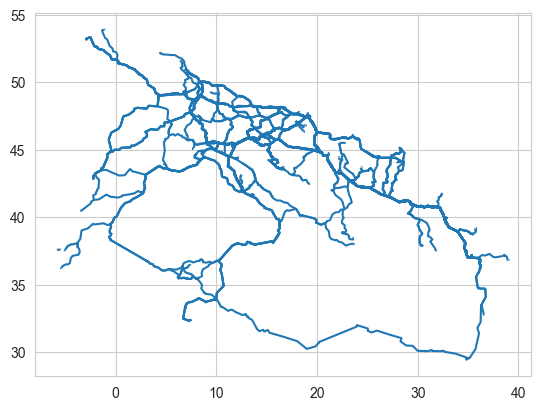

In [7]:
orig_dest155.plot()

In [8]:
# - start with simple space-abstracted animation of dots moving from origo to destintion
# - in a next step, we will move it to Orbis
